<a href="https://colab.research.google.com/github/ANVITHA112023/Student-performance-analysis-project/blob/main/hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("student_marks.csv")

# Display the first few rows
print(df.head(10))


  Unnamed: 0 Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0       John      M  05-04-1988     55       45         56       87       21   
1     Suresh      M  04-05-1987     75       96         78       64       90   
2     Ramesh      M  25-05-1989     25       54         89       76       95   
3    Jessica      F  12-08-1990     78       96         86       63       54   
4   Jennifer      F  02-09-1989     58       96         78       46       96   
5       Annu      F  05-04-1988     45       87         52       89       55   
6      pooja      F  04-05-1987     55       64         61       58       75   
7     Ritesh      M  25-05-1989     54       76         87       56       25   
8      Farha      F  12-08-1990     55       63         89       75       78   
9     Mukesh      M  02-09-1989     96       46         77       83       58   

   Economics  History  Civics  
0         52       89      65  
1         61       58       2  
2         87       56  

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (you can choose to drop or fill them)
#df = df.fillna(df.mean())  # For numerical columns, filling with the mean value

# Or, for categorical columns, you might use the mode:
# df['engagement_level'] = df['engagement_level'].fillna(df['engagement_level'].mode()[0])

# Check for duplicates
df = df.drop_duplicates()

# Verify the changes
print(df.info())


Unnamed: 0    0
Gender        0
DOB           0
Maths         0
Physics       0
Chemistry     0
English       0
Biology       0
Economics     0
History       0
Civics        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   Gender      10 non-null     object
 2   DOB         10 non-null     object
 3   Maths       10 non-null     int64 
 4   Physics     10 non-null     int64 
 5   Chemistry   10 non-null     int64 
 6   English     10 non-null     int64 
 7   Biology     10 non-null     int64 
 8   Economics   10 non-null     int64 
 9   History     10 non-null     int64 
 10  Civics      10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1012.0+ bytes
None


In [ ]:
# Summary statistics for numerical columns
print(df.describe())


           Maths    Physics  Chemistry    English    Biology  Economics  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean   59.600000  72.300000  75.300000  69.700000  64.700000  72.700000   
std    19.460501  20.661559  14.000397  14.453373  26.998148  14.629119   
min    25.000000  45.000000  52.000000  46.000000  21.000000  52.000000   
25%    54.250000  56.250000  65.000000  59.250000  54.250000  58.750000   
50%    55.000000  70.000000  78.000000  69.500000  66.500000  76.000000   
75%    70.750000  93.750000  86.750000  81.250000  87.000000  86.000000   
max    96.000000  96.000000  89.000000  89.000000  96.000000  89.000000   

         History   Civics  
count  10.000000  10.0000  
mean   69.700000  60.5000  
std    14.453373  25.3432  
min    46.000000   2.0000  
25%    59.250000  52.2500  
50%    69.500000  63.0000  
75%    81.250000  76.2500  
max    89.000000  89.0000  


Index(['Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'Economics',
       'History', 'Civics'],
      dtype='object')
              Maths   Physics  Chemistry   English   Biology  Economics  \
Maths      1.000000  0.113354   0.076751 -0.064074 -0.146598   0.000312   
Physics    0.113354  1.000000   0.117192 -0.562608  0.279638   0.191851   
Chemistry  0.076751  0.117192   1.000000 -0.409680  0.318032   0.235390   
English   -0.064074 -0.562608  -0.409680  1.000000 -0.330844   0.237577   
Biology   -0.146598  0.279638   0.318032 -0.330844  1.000000   0.370531   
Economics  0.000312  0.191851   0.235390  0.237577  0.370531   1.000000   
History   -0.320846  0.334082  -0.482710 -0.038775 -0.456131  -0.164953   
Civics    -0.274629 -0.643266   0.210908  0.186705 -0.330060   0.043905   

            History    Civics  
Maths     -0.320846 -0.274629  
Physics    0.334082 -0.643266  
Chemistry -0.482710  0.210908  
English   -0.038775  0.186705  
Biology   -0.456131 -0.330060  
Econom

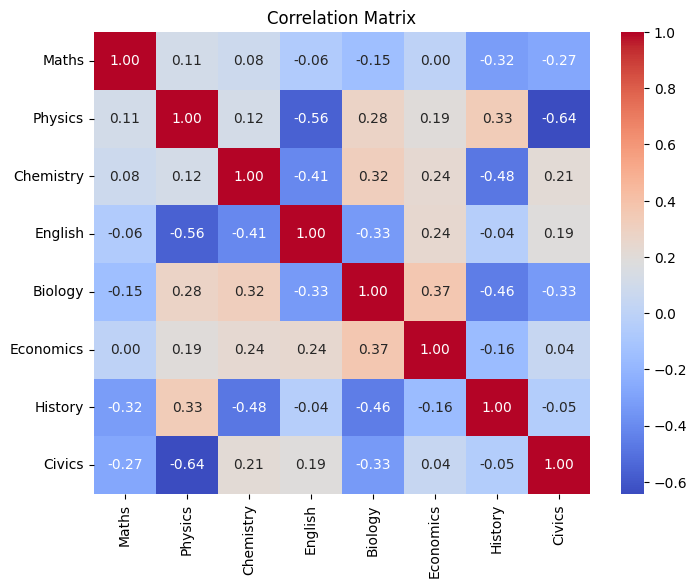

In [ ]:
import seaborn as sns #statistical graphics
import matplotlib.pyplot as plt #potting
numerical=df.select_dtypes(include=[np.number]).columns
print(numerical)
# Correlation matrix  linear reltionship between numerical columns
corr_matrix = df[numerical].corr()
print(corr_matrix)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



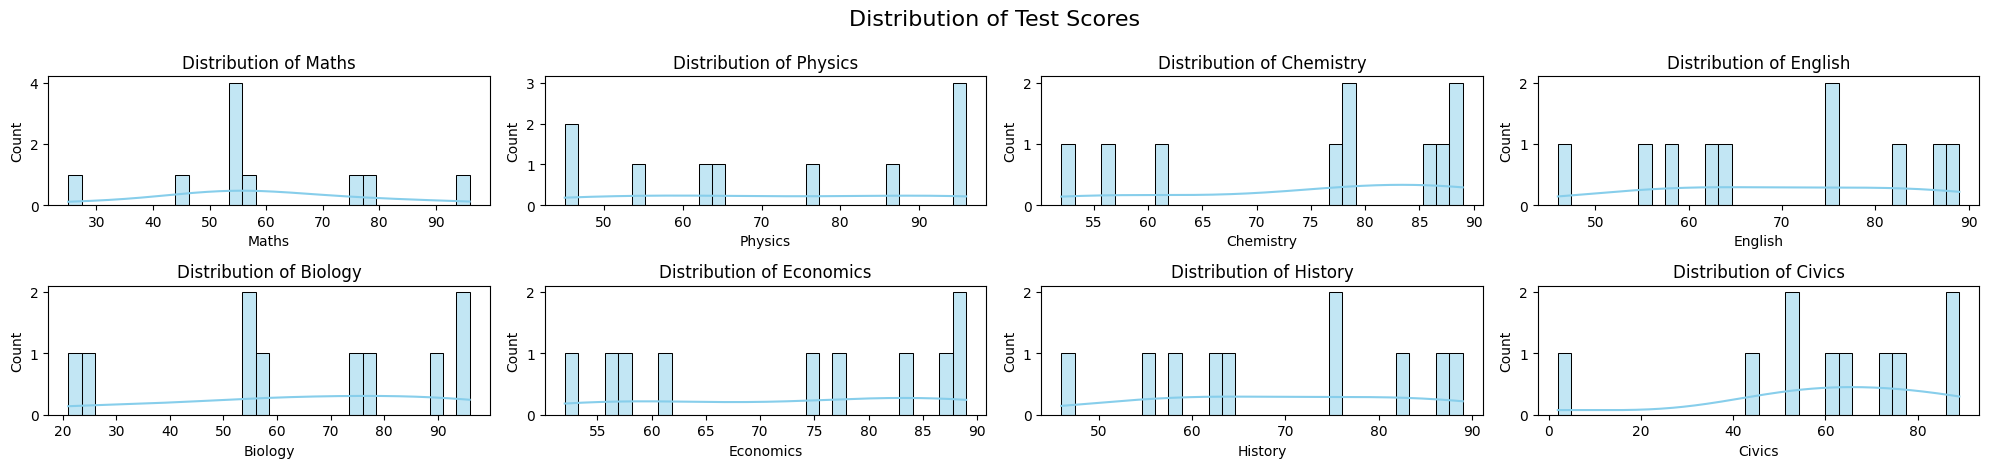

In [ ]:
# Create a figure with larger size to fit subplots
plt.figure(figsize=(20, 6))

# Loop over each feature to create a subplot
for i, feature in enumerate(numerical):
    plt.subplot(3, 4, i+1)  # 3 rows and 4 columns
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')


# Adjust layout to avoid overlap
plt.tight_layout()

# Overall Title for the entire plot
plt.suptitle('Distribution of Test Scores', y=1.05, fontsize=16)

# Show the plot
plt.show()

In [ ]:
# Filter data for 'John'
john_data = df[df['Unnamed: 0'] == 'John'].iloc[0]

# Subjects list
subjects = ['Maths', 'Physics', 'Chemistry', 'English', 'Biology',
            'Economics', 'History', 'Civics']

# Print individual subject performance
print(f"Performance of {john_data['Unnamed: 0']}:")

for subject in subjects:
    score = john_data[subject]
    print(f"{subject}: {score} marks")


Performance of John:
Maths: 55 marks
Physics: 45 marks
Chemistry: 56 marks
English: 87 marks
Biology: 21 marks
Economics: 52 marks
History: 89 marks
Civics: 65 marks


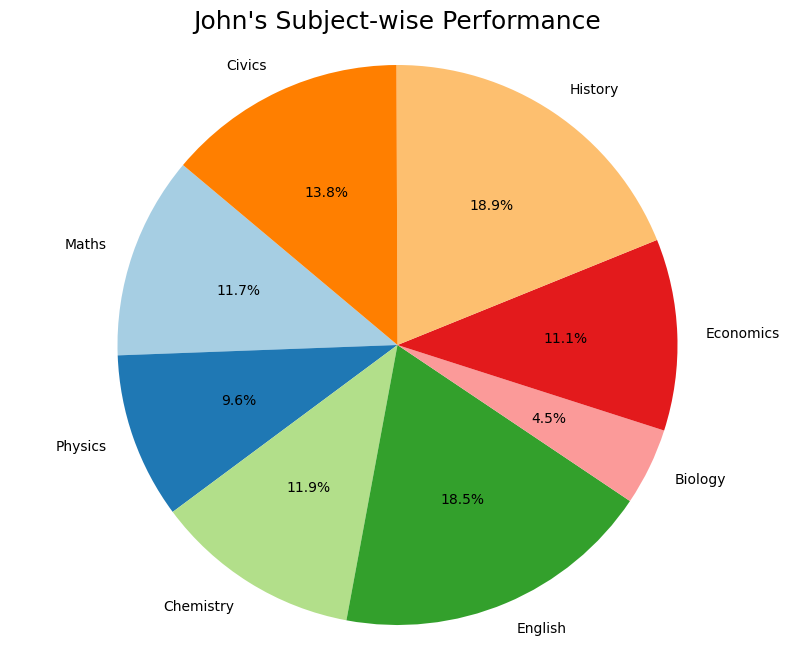

In [ ]:

# Filter the data for John
john_data = df[df['Unnamed: 0'] == 'John'].iloc[0]

# Subjects list
subjects = ['Maths', 'Physics', 'Chemistry', 'English', 'Biology',
            'Economics', 'History', 'Civics']

# Get John's marks
marks = john_data[subjects]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(marks, labels=subjects, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("John's Subject-wise Performance", fontsize=18)
plt.axis('equal')  # Equal aspect ratio to make the pie chart round
plt.show()
